# K-Means con Python: agrupación de creadores de tiros en la Premier League

En este notebook agruparemos en clústeres de <b>k-means</b>. Usaremos el algoritmo para poner a los jugadores en diferentes grupos en función de sus acciones de creación de tiros. El set de datos se pueden encontrar en  fbref.com  de  Statsbomb. 

El proceso tomará los siguientes pasos:
<ol>
    <li> Verificar y ordenar el conjunto de datos.</li>
    <li> Crear el modelo k-means y asignar a cada jugador a un grupo de jugadores similares.</li>
    <li> Describir y visualizar resultados.</li>
</ol>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from IPython.display import Image
from IPython.core.display import HTML 

Cargamos nuestro set de datos

In [5]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

data = pd.read_csv('SCA.csv', sep=';', header=0)
display(data)

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive,PassDead,Drib,Sh,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1,OG
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,30-113,1990.0,8.2,17,2.07,15,2,0,0,0,0,2,0.24,2,0,0,0,0,0,0
1,2,Tammy Abraham,eng ENG,FW,Chelsea,23-079,1997.0,6.7,14,2.09,8,0,1,2,3,0,2,0.30,1,0,0,0,1,0,0
2,3,Che Adams,eng ENG,FW,Southampton,24-160,1996.0,13.3,27,2.03,21,0,1,3,2,0,5,0.38,5,0,0,0,0,0,0
3,4,Tosin Adarabioyo,eng ENG,DF,Fulham,23-087,1997.0,10.0,8,0.80,8,0,0,0,0,0,1,0.10,1,0,0,0,0,0,0
4,5,Adrián,es ESP,GK,Liverpool,33-352,1987.0,2.0,0,0.00,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0
5,6,Sergio Agüero,ar ARG,FW,Manchester City,32-201,1988.0,1.4,4,2.90,4,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0
6,7,Ola Aina,ng NGA,DF,Fulham,24-073,1996.0,11.0,12,1.09,11,1,0,0,0,0,1,0.09,1,0,0,0,0,0,0
7,8,Rayan Aït Nouri,fr FRA,DF,Wolves,19-197,2001.0,3.1,5,1.64,5,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0
8,9,Semi Ajayi,ng NGA,DF,West Brom,27-041,1993.0,12.0,3,0.25,2,0,0,1,0,0,2,0.17,1,0,0,1,0,0,0
9,10,Nathan Aké,nl NED,DF,Manchester City,25-306,1995.0,4.2,2,0.47,2,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0


### PASO 1: Verificamos y ordenamos el conjunto de datos
Al observar nuestro set de datos, tenemos información biográfica del jugador, junto con los números de creación de disparos y su tipo.

Trabajamos algunas columnas para limpiarlas y estandarizarlas:

In [6]:
#Creo la funcion clear_nation para que me devuelva los ultimos 3 carácteres de la cadena del texto pasado como parametro
def clear_nation(c):
    try:
      return c[-3:]
    except:
      return c

In [7]:
#Uso la función clear_nation para limpiar las nacionalidades
data['Nation'] = data['Nation'].apply(lambda x: clear_nation(x))
data.head(2)

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive,PassDead,Drib,Sh,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1,OG
0,1,Patrick van Aanholt,NED,DF,Crystal Palace,30-113,1990.0,8.2,17,2.07,15,2,0,0,0,0,2,0.24,2,0,0,0,0,0,0
1,2,Tammy Abraham,ENG,FW,Chelsea,23-079,1997.0,6.7,14,2.09,8,0,1,2,3,0,2,0.30,1,0,0,0,1,0,0


In [8]:
#Algunas posiciones tienen 2 opciones (por ejemplo MF, FW), usemos la primera posición o sea las dos primeras letras
data['Pos'] = data['Pos'].str[:2]

data.head(2)

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive,PassDead,Drib,Sh,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1,OG
0,1,Patrick van Aanholt,NED,DF,Crystal Palace,30-113,1990.0,8.2,17,2.07,15,2,0,0,0,0,2,0.24,2,0,0,0,0,0,0
1,2,Tammy Abraham,ENG,FW,Chelsea,23-079,1997.0,6.7,14,2.09,8,0,1,2,3,0,2,0.30,1,0,0,0,1,0,0


Como suposición general, podemos esperar que los jugadores de mejores equipos creen más tiros y que los jugadores de peores equipos produzcan menos. Esto puede producir resultados que agrupen a los jugadores en función de sus niveles de producción, no de los estilos de sus producciones.

Como tal, creemos algunas columnas nuevas para ver los porcentajes de cada tipo de acción. Haremos esto creando una columna de suma y luego dividiendo cada columna por la suma.

In [11]:
#Creamos una nueva columna que sume la lista de columnas que deseamos.
add_list = ['PassLive', 'PassDead', 'Drib', 'Sh', 'Fld']
data['Sum SCA'] = data[add_list].sum(axis=1)

#Creamos una nueva columna
data['Pass SCA Ratio'] = data['PassLive']/data['SCA']
data.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive,PassDead,Drib,Sh,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1,OG,Sum SCA,Pass SCA Ratio
0,1,Patrick van Aanholt,NED,DF,Crystal Palace,30-113,1990.0,8.2,17,2.07,15,2,0,0,0,0,2,0.24,2,0,0,0,0,0,0,17,0.882353
1,2,Tammy Abraham,ENG,FW,Chelsea,23-079,1997.0,6.7,14,2.09,8,0,1,2,3,0,2,0.30,1,0,0,0,1,0,0,14,0.571429
2,3,Che Adams,ENG,FW,Southampton,24-160,1996.0,13.3,27,2.03,21,0,1,3,2,0,5,0.38,5,0,0,0,0,0,0,27,0.777778
3,4,Tosin Adarabioyo,ENG,DF,Fulham,23-087,1997.0,10.0,8,0.80,8,0,0,0,0,0,1,0.10,1,0,0,0,0,0,0,8,1.000000
4,5,Adrián,ESP,GK,Liverpool,33-352,1987.0,2.0,0,0.00,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,NaN


In [13]:
#Creamos nuevos nombres de columna agregando una 'proporción' (Ratio) a cada nombre en nuestra lista anterior
new_cols_list = [each + ' Ratio' for each in add_list]

#Para cada nuevo nombre de columna, calculamos la columna exactamente como lo hicimos anteriormente
for idx, val in enumerate(new_cols_list):
    data[val] = data[add_list[idx]]/data['Sum SCA']

#Cree una suma de los porcentajes para comprobar que todos suman 1
data['Sum SCA Ratio'] = data[new_cols_list].sum(axis=1)
data.head(5)

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive,PassDead,Drib,Sh,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1,OG,Sum SCA,Pass SCA Ratio,PassLive Ratio,PassDead Ratio,Drib Ratio,Sh Ratio,Fld Ratio,Sum SCA Ratio
0,1,Patrick van Aanholt,NED,DF,Crystal Palace,30-113,1990.0,8.2,17,2.07,15,2,0,0,0,0,2,0.24,2,0,0,0,0,0,0,17,0.882353,0.882353,0.117647,0.000000,0.000000,0.000000,1.0
1,2,Tammy Abraham,ENG,FW,Chelsea,23-079,1997.0,6.7,14,2.09,8,0,1,2,3,0,2,0.30,1,0,0,0,1,0,0,14,0.571429,0.571429,0.000000,0.071429,0.142857,0.214286,1.0
2,3,Che Adams,ENG,FW,Southampton,24-160,1996.0,13.3,27,2.03,21,0,1,3,2,0,5,0.38,5,0,0,0,0,0,0,27,0.777778,0.777778,0.000000,0.037037,0.111111,0.074074,1.0
3,4,Tosin Adarabioyo,ENG,DF,Fulham,23-087,1997.0,10.0,8,0.80,8,0,0,0,0,0,1,0.10,1,0,0,0,0,0,0,8,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
4,5,Adrián,ESP,GK,Liverpool,33-352,1987.0,2.0,0,0.00,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [15]:
#Nuevo dataframe donde Pos == FW o MF. Y jugó más de 5 de 90s y creó más de 15 tiros
data_mffw = data[((data['Pos'] == 'FW') | (data['Pos'] == 'MF')) & (data['90s'] > 5) & (data['SCA'] > 15)]

data_mffw.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive,PassDead,Drib,Sh,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1,OG,Sum SCA,Pass SCA Ratio,PassLive Ratio,PassDead Ratio,Drib Ratio,Sh Ratio,Fld Ratio,Sum SCA Ratio
2,3,Che Adams,ENG,FW,Southampton,24-160,1996.0,13.3,27,2.03,21,0,1,3,2,0,5,0.38,5,0,0,0,0,0,0,27,0.777778,0.777778,0.000000,0.037037,0.111111,0.074074,1.0
16,17,Allan,BRA,MF,Everton,29-347,1991.0,11.4,17,1.49,12,0,3,1,1,0,1,0.09,1,0,0,0,0,0,0,17,0.705882,0.705882,0.000000,0.176471,0.058824,0.058824,1.0
18,19,Miguel Almirón,PAR,MF,Newcastle Utd,26-314,1994.0,7.5,16,2.13,14,0,1,0,1,0,2,0.27,2,0,0,0,0,0,0,16,0.875000,0.875000,0.000000,0.062500,0.000000,0.062500,1.0
20,21,Steven Alzate,COL,MF,Brighton,22-103,1998.0,5.3,17,3.21,14,0,1,2,0,0,1,0.19,1,0,0,0,0,0,0,17,0.823529,0.823529,0.000000,0.058824,0.117647,0.000000,1.0
25,26,Michail Antonio,ENG,FW,West Ham,30-267,1990.0,5.8,21,3.59,10,1,1,3,6,0,2,0.34,0,1,0,0,1,0,0,21,0.476190,0.476190,0.047619,0.047619,0.142857,0.285714,1.0


## PASO 2: Crear el modelo k-means y asignar a cada jugador a un grupo de jugadores similares
Disponemos de nuestro set de datos preparado con los datos que queremos analizar. A partir de aquí, buscamos agrupar a nuestros jugadores en grupos. 

Una forma de hacerlo es colocando el centro de los clústeres en algún lugar aleatorio de nuestros datos. A partir de aquí, a los jugadores se les asigna un grupo en función de cuáles son más cercanos.

In [17]:
km = KMeans(n_clusters=5, init='random', random_state=0)

In [18]:
y_km = km.fit_predict(data_mffw[new_cols_list])
y_km

array([4, 0, 1, 1, 0, 1, 4, 0, 1, 0, 1, 4, 1, 3, 4, 2, 0, 2, 1, 4, 3, 1,
       3, 0, 1, 2, 3, 4, 2, 0, 4, 1, 3, 2, 1, 1, 1, 3, 2, 1, 4, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 3, 1, 4, 1, 3, 2, 3, 4, 4, 1, 1, 2, 2, 4, 2, 2,
       1, 3, 1, 2, 3, 0, 4, 4, 1, 0, 0, 1, 4, 3, 1, 1, 4, 4, 2, 2, 1, 0,
       1, 3, 0, 4, 3, 0, 2, 1, 0, 3, 4, 3, 0, 0, 0], dtype=int32)

Tenemos una matriz de valores de clúster para nuestro set de datos. Hemos crear un modelo de agrupación en clústeres.

La matriz no es demasiado útil por sí sola, así que asignémos a sus jugadores correspondientes agregándolos como una nueva columna:

In [20]:
data_mffw['Cluster'] = y_km
data_mffw.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive,PassDead,Drib,Sh,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1,OG,Sum SCA,Pass SCA Ratio,PassLive Ratio,PassDead Ratio,Drib Ratio,Sh Ratio,Fld Ratio,Sum SCA Ratio,Cluster
2,3,Che Adams,ENG,FW,Southampton,24-160,1996.0,13.3,27,2.03,21,0,1,3,2,0,5,0.38,5,0,0,0,0,0,0,27,0.777778,0.777778,0.000000,0.037037,0.111111,0.074074,1.0,4
16,17,Allan,BRA,MF,Everton,29-347,1991.0,11.4,17,1.49,12,0,3,1,1,0,1,0.09,1,0,0,0,0,0,0,17,0.705882,0.705882,0.000000,0.176471,0.058824,0.058824,1.0,0
18,19,Miguel Almirón,PAR,MF,Newcastle Utd,26-314,1994.0,7.5,16,2.13,14,0,1,0,1,0,2,0.27,2,0,0,0,0,0,0,16,0.875000,0.875000,0.000000,0.062500,0.000000,0.062500,1.0,1
20,21,Steven Alzate,COL,MF,Brighton,22-103,1998.0,5.3,17,3.21,14,0,1,2,0,0,1,0.19,1,0,0,0,0,0,0,17,0.823529,0.823529,0.000000,0.058824,0.117647,0.000000,1.0,1
25,26,Michail Antonio,ENG,FW,West Ham,30-267,1990.0,5.8,21,3.59,10,1,1,3,6,0,2,0.34,0,1,0,0,1,0,0,21,0.476190,0.476190,0.047619,0.047619,0.142857,0.285714,1.0,0


## PASO 3: Describir y visualizar resultados
Podemos ver el grupo de cada jugador. Echemos un vistazo a nuestro primer grupo


In [21]:
data_mffw[data_mffw['Cluster'] == 0].head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive,PassDead,Drib,Sh,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1,OG,Sum SCA,Pass SCA Ratio,PassLive Ratio,PassDead Ratio,Drib Ratio,Sh Ratio,Fld Ratio,Sum SCA Ratio,Cluster
16,17,Allan,BRA,MF,Everton,29-347,1991.0,11.4,17,1.49,12,0,3,1,1,0,1,0.09,1,0,0,0,0,0,0,17,0.705882,0.705882,0.000000,0.176471,0.058824,0.058824,1.0,0
25,26,Michail Antonio,ENG,FW,West Ham,30-267,1990.0,5.8,21,3.59,10,1,1,3,6,0,2,0.34,0,1,0,0,1,0,0,21,0.476190,0.476190,0.047619,0.047619,0.142857,0.285714,1.0,0
39,40,Patrick Bamford,ENG,FW,Leeds United,27-106,1993.0,12.2,17,1.40,11,0,2,1,2,1,6,0.49,2,0,2,0,2,0,0,16,0.647059,0.687500,0.000000,0.125000,0.062500,0.125000,1.0,0
44,45,Harvey Barnes,ENG,MF,Leicester City,23-011,1997.0,9.3,21,2.26,13,0,4,3,1,0,3,0.32,1,0,2,0,0,0,0,21,0.619048,0.619048,0.000000,0.190476,0.142857,0.047619,1.0,0
74,75,Dominic Calvert-Lewin,ENG,FW,Everton,23-279,1997.0,13.7,26,1.89,15,0,2,5,4,0,7,0.51,2,0,0,4,1,0,0,26,0.576923,0.576923,0.000000,0.076923,0.192308,0.153846,1.0,0


En este encontramos un buen número de lanzadores de balón parado, junto con números de pases altos y regates bajos.

Compáremoslo con el siguiente grupo, que presenta menos lanzadores de jugadas a balón parado y más creaciones de oportunidades a partir de regates, tiros y faltas:

In [23]:
data_mffw[data_mffw['Cluster'] == 1].head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive,PassDead,Drib,Sh,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1,OG,Sum SCA,Pass SCA Ratio,PassLive Ratio,PassDead Ratio,Drib Ratio,Sh Ratio,Fld Ratio,Sum SCA Ratio,Cluster
18,19,Miguel Almirón,PAR,MF,Newcastle Utd,26-314,1994.0,7.5,16,2.13,14,0,1,0,1,0,2,0.27,2,0,0,0,0,0,0,16,0.875000,0.875000,0.0,0.062500,0.000000,0.0625,1.0,1
20,21,Steven Alzate,COL,MF,Brighton,22-103,1998.0,5.3,17,3.21,14,0,1,2,0,0,1,0.19,1,0,0,0,0,0,0,17,0.823529,0.823529,0.0,0.058824,0.117647,0.0000,1.0,1
27,28,Stuart Armstrong,SCO,MF,Southampton,28-265,1992.0,10.4,20,1.93,18,0,1,0,0,1,6,0.58,4,0,1,0,0,1,0,19,0.900000,0.947368,0.0,0.052632,0.000000,0.0000,1.0,1
43,44,Ashley Barnes,ENG,FW,Burnley,31-051,1989.0,5.9,17,2.86,13,0,0,3,0,1,0,0.00,0,0,0,0,0,0,0,16,0.764706,0.812500,0.0,0.000000,0.187500,0.0000,1.0,1
55,56,Sander Berge,NOR,MF,Sheffield Utd,22-310,1998.0,11.3,22,1.95,18,0,2,1,0,1,1,0.09,0,0,0,1,0,0,0,21,0.818182,0.857143,0.0,0.095238,0.047619,0.0000,1.0,1


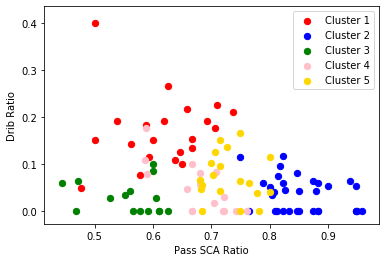

In [24]:
def plotClusters(xAxis, yAxis):
    plt.scatter(data_mffw[data_mffw['Cluster']==0][xAxis], data_mffw[data_mffw['Cluster']==0][yAxis], s=40, c='red', label ='Cluster 1')
    plt.scatter(data_mffw[data_mffw['Cluster']==1][xAxis], data_mffw[data_mffw['Cluster']==1][yAxis], s=40, c='blue', label ='Cluster 2')
    plt.scatter(data_mffw[data_mffw['Cluster']==2][xAxis], data_mffw[data_mffw['Cluster']==2][yAxis], s=40, c='green', label ='Cluster 3')
    plt.scatter(data_mffw[data_mffw['Cluster']==3][xAxis], data_mffw[data_mffw['Cluster']==3][yAxis], s=40, c='pink', label ='Cluster 4')
    plt.scatter(data_mffw[data_mffw['Cluster']==4][xAxis], data_mffw[data_mffw['Cluster']==4][yAxis], s=40, c='gold', label ='Cluster 5')
    plt.xlabel(xAxis)
    plt.ylabel(yAxis)    
    plt.legend() 
    
plotClusters('Pass SCA Ratio', 'Drib Ratio')

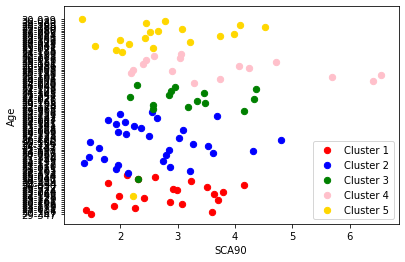

In [25]:
#Edad vs número de creaciones de disparos por 90, dividido por grupo
plotClusters('SCA90', 'Age')

### EXTRA
Visualizamos los jugadores de cada grupo

## Grupo 1: Cluster 0
Grandes pasadores con poco regate

In [26]:
data_mffw[data_mffw['Cluster'] == 0]

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive,PassDead,Drib,Sh,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1,OG,Sum SCA,Pass SCA Ratio,PassLive Ratio,PassDead Ratio,Drib Ratio,Sh Ratio,Fld Ratio,Sum SCA Ratio,Cluster
16,17,Allan,BRA,MF,Everton,29-347,1991.0,11.4,17,1.49,12,0,3,1,1,0,1,0.09,1,0,0,0,0,0,0,17,0.705882,0.705882,0.000000,0.176471,0.058824,0.058824,1.0,0
25,26,Michail Antonio,ENG,FW,West Ham,30-267,1990.0,5.8,21,3.59,10,1,1,3,6,0,2,0.34,0,1,0,0,1,0,0,21,0.476190,0.476190,0.047619,0.047619,0.142857,0.285714,1.0,0
39,40,Patrick Bamford,ENG,FW,Leeds United,27-106,1993.0,12.2,17,1.40,11,0,2,1,2,1,6,0.49,2,0,2,0,2,0,0,16,0.647059,0.687500,0.000000,0.125000,0.062500,0.125000,1.0,0
44,45,Harvey Barnes,ENG,MF,Leicester City,23-011,1997.0,9.3,21,2.26,13,0,4,3,1,0,3,0.32,1,0,2,0,0,0,0,21,0.619048,0.619048,0.000000,0.190476,0.142857,0.047619,1.0,0
74,75,Dominic Calvert-Lewin,ENG,FW,Everton,23-279,1997.0,13.7,26,1.89,15,0,2,5,4,0,7,0.51,2,0,0,4,1,0,0,26,0.576923,0.576923,0.000000,0.076923,0.192308,0.153846,1.0,0
114,115,Moussa Djenepo,MLI,MF,Southampton,22-188,1998.0,6.5,20,3.07,10,0,8,0,2,0,4,0.61,1,0,2,0,1,0,0,20,0.500000,0.500000,0.000000,0.400000,0.000000,0.100000,1.0,0
136,137,Phil Foden,ENG,FW,Manchester City,20-206,2000.0,5.6,16,2.86,10,0,4,1,0,1,3,0.54,2,0,0,1,0,0,0,15,0.625000,0.666667,0.000000,0.266667,0.066667,0.000000,1.0,0
192,193,Gabriel Jesus,BRA,FW,Manchester City,23-261,1997.0,7.0,26,3.71,14,0,5,1,6,0,2,0.29,2,0,0,0,0,0,0,26,0.538462,0.538462,0.000000,0.192308,0.038462,0.230769,1.0,0
193,194,Raúl Jiménez,MEX,FW,Wolves,29-229,1991.0,9.1,22,2.41,11,0,3,4,2,2,4,0.44,1,0,1,2,0,0,0,20,0.500000,0.550000,0.000000,0.150000,0.200000,0.100000,1.0,0
194,195,Joelinton,BRA,FW,Newcastle Utd,24-128,1996.0,8.1,16,1.98,9,0,2,1,2,2,4,0.50,2,0,1,0,1,0,0,14,0.562500,0.642857,0.000000,0.142857,0.071429,0.142857,1.0,0


## Grupo 2: Cluster 1
No hay acciones a balón parado, dominan los pases pero las contribuciones son de otros tipos. 
Similar al grupo 4 que a diferencia de estos presentan también perdidas de balón.

In [27]:
data_mffw[data_mffw['Cluster'] == 1]

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive,PassDead,Drib,Sh,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1,OG,Sum SCA,Pass SCA Ratio,PassLive Ratio,PassDead Ratio,Drib Ratio,Sh Ratio,Fld Ratio,Sum SCA Ratio,Cluster
18,19,Miguel Almirón,PAR,MF,Newcastle Utd,26-314,1994.0,7.5,16,2.13,14,0,1,0,1,0,2,0.27,2,0,0,0,0,0,0,16,0.875000,0.875000,0.000000,0.062500,0.000000,0.062500,1.0,1
20,21,Steven Alzate,COL,MF,Brighton,22-103,1998.0,5.3,17,3.21,14,0,1,2,0,0,1,0.19,1,0,0,0,0,0,0,17,0.823529,0.823529,0.000000,0.058824,0.117647,0.000000,1.0,1
27,28,Stuart Armstrong,SCO,MF,Southampton,28-265,1992.0,10.4,20,1.93,18,0,1,0,0,1,6,0.58,4,0,1,0,0,1,0,19,0.900000,0.947368,0.000000,0.052632,0.000000,0.000000,1.0,1
43,44,Ashley Barnes,ENG,FW,Burnley,31-051,1989.0,5.9,17,2.86,13,0,0,3,0,1,0,0.00,0,0,0,0,0,0,0,16,0.764706,0.812500,0.000000,0.000000,0.187500,0.000000,1.0,1
55,56,Sander Berge,NOR,MF,Sheffield Utd,22-310,1998.0,11.3,22,1.95,18,0,2,1,0,1,1,0.09,0,0,0,1,0,0,0,21,0.818182,0.857143,0.000000,0.095238,0.047619,0.000000,1.0,1
60,61,Yves Bissouma,MLI,MF,Brighton,24-112,1996.0,11.8,16,1.36,13,0,0,2,0,1,1,0.08,1,0,0,0,0,0,0,15,0.812500,0.866667,0.000000,0.000000,0.133333,0.000000,1.0,1
82,83,Dani Ceballos,ESP,MF,Arsenal,24-135,1996.0,9.5,26,2.75,22,2,0,0,1,1,1,0.11,1,0,0,0,0,0,0,25,0.846154,0.880000,0.080000,0.000000,0.000000,0.040000,1.0,1
105,106,Leander Dendoncker,BEL,MF,Wolves,25-249,1995.0,10.5,18,1.71,15,0,0,3,0,0,2,0.19,0,0,0,2,0,0,0,18,0.833333,0.833333,0.000000,0.000000,0.166667,0.000000,1.0,1
117,118,Abdoulaye Doucouré,FRA,MF,Everton,27-354,1993.0,13.1,19,1.45,18,0,1,0,0,0,2,0.15,2,0,0,0,0,0,0,19,0.947368,0.947368,0.000000,0.052632,0.000000,0.000000,1.0,1
141,142,Fred,BRA,MF,Manchester Utd,27-290,1993.0,7.1,20,2.80,19,0,0,0,0,1,2,0.28,1,0,0,0,0,1,0,19,0.950000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,1


## Grupo 3: Cluster 2
El grupo con mayor volumen de jugadores. Así que tenemos muchos mediocentros defensivos. Lo interesante es que es notable que muchos de los jugadores no son del pais de la liga.

In [28]:
data_mffw[data_mffw['Cluster'] == 2]

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive,PassDead,Drib,Sh,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1,OG,Sum SCA,Pass SCA Ratio,PassLive Ratio,PassDead Ratio,Drib Ratio,Sh Ratio,Fld Ratio,Sum SCA Ratio,Cluster
73,74,Tom Cairney,SCO,MF,Fulham,29-335,1991.0,8.4,35,4.15,21,8,3,1,2,0,2,0.24,2,0,0,0,0,0,0,35,0.600000,0.600000,0.228571,0.085714,0.028571,0.057143,1.0,2
80,81,Ivan Cavaleiro,POR,FW,Fulham,27-063,1993.0,9.8,25,2.56,14,6,1,3,0,1,1,0.10,1,0,0,0,0,0,0,24,0.560000,0.583333,0.250000,0.041667,0.125000,0.000000,1.0,2
127,128,Eberechi Eze,ENG,MF,Crystal Palace,22-174,1998.0,9.1,29,3.18,16,6,1,1,5,0,2,0.22,0,1,0,0,1,0,0,29,0.551724,0.551724,0.206897,0.034483,0.034483,0.172414,1.0,2
135,136,John Fleck,SCO,MF,Sheffield Utd,29-118,1991.0,7.0,18,2.57,11,5,0,2,0,0,0,0.00,0,0,0,0,0,0,0,18,0.611111,0.611111,0.277778,0.000000,0.111111,0.000000,1.0,2
160,161,Pascal Groß,GER,MF,Brighton,29-188,1991.0,6.9,24,3.48,15,9,0,0,0,0,3,0.44,3,0,0,0,0,0,0,24,0.625000,0.625000,0.375000,0.000000,0.000000,0.000000,1.0,2
176,177,Son Heung-min,KOR,FW,Tottenham,28-165,1992.0,12.0,40,3.33,24,11,4,0,1,0,7,0.58,6,0,1,0,0,0,0,40,0.600000,0.600000,0.275000,0.100000,0.000000,0.025000,1.0,2
248,249,James Maddison,ENG,MF,Leicester City,24-027,1996.0,7.8,34,4.33,16,8,2,1,5,2,5,0.64,2,0,0,0,2,1,0,32,0.470588,0.500000,0.250000,0.062500,0.031250,0.156250,1.0,2
270,271,Dwight McNeil,ENG,MF,Burnley,21-028,1999.0,12.0,26,2.17,15,7,0,0,4,0,2,0.17,1,1,0,0,0,0,0,26,0.576923,0.576923,0.269231,0.000000,0.000000,0.153846,1.0,2
277,278,Luka Milivojević,SRB,MF,Crystal Palace,29-257,1991.0,6.3,18,2.85,8,7,1,0,1,1,1,0.16,0,1,0,0,0,0,0,17,0.444444,0.470588,0.411765,0.058824,0.000000,0.058824,1.0,2
286,287,Mason Mount,ENG,MF,Chelsea,21-345,1999.0,11.0,38,3.45,20,13,1,2,1,1,6,0.55,1,3,0,2,0,0,0,37,0.526316,0.540541,0.351351,0.027027,0.054054,0.027027,1.0,2


## Grupo 4: Cluster 3
Mayormente son jugadores que pasan bastante el balón, pero también tienen una alta generación de oportunidades mediantes regates y tiros.

In [29]:
data_mffw[data_mffw['Cluster'] == 3]

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive,PassDead,Drib,Sh,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1,OG,Sum SCA,Pass SCA Ratio,PassLive Ratio,PassDead Ratio,Drib Ratio,Sh Ratio,Fld Ratio,Sum SCA Ratio,Cluster
62,63,Jarrod Bowen,ENG,MF,West Ham,24-000,1996.0,11.8,39,3.29,23,5,3,6,1,1,4,0.34,2,2,0,0,0,0,0,38,0.589744,0.605263,0.131579,0.078947,0.157895,0.026316,1.0,3
102,103,Kevin De Bruyne,BEL,MF,Manchester City,29-175,1991.0,11.3,72,6.40,49,12,4,2,2,3,12,1.07,9,0,1,0,1,1,0,69,0.680556,0.710145,0.173913,0.057971,0.028986,0.028986,1.0,3
108,109,Raphael Dias Belloli,BRA,MF,Leeds United,24-006,1996.0,5.6,21,3.74,14,3,2,1,0,1,1,0.18,1,0,0,0,0,0,0,20,0.666667,0.700000,0.150000,0.100000,0.050000,0.000000,1.0,3
130,131,Bruno Fernandes,POR,MF,Manchester Utd,26-103,1994.0,10.7,61,5.70,43,10,1,2,4,1,11,1.03,8,2,0,1,0,0,0,60,0.704918,0.716667,0.166667,0.016667,0.033333,0.066667,1.0,3
158,159,Jack Grealish,ENG,FW,Aston Villa,25-101,1995.0,11.0,72,6.55,51,9,6,1,5,0,9,0.82,7,0,0,0,2,0,0,72,0.708333,0.708333,0.125000,0.083333,0.013889,0.069444,1.0,3
173,174,Jordan Henderson,ENG,MF,Liverpool,30-186,1990.0,9.6,21,2.18,16,4,0,0,0,1,3,0.31,2,1,0,0,0,0,0,20,0.761905,0.800000,0.200000,0.000000,0.000000,0.000000,1.0,3
218,219,Filip Krovinović,CRO,MF,West Brom,25-113,1995.0,5.9,17,2.90,10,3,3,0,1,0,1,0.17,1,0,0,0,0,0,0,17,0.588235,0.588235,0.176471,0.176471,0.000000,0.058824,1.0,3
246,247,John Lundstram,ENG,MF,Sheffield Utd,26-306,1994.0,8.1,18,2.22,13,4,0,0,0,1,1,0.12,0,1,0,0,0,0,0,17,0.722222,0.764706,0.235294,0.000000,0.000000,0.000000,1.0,3
250,251,Riyad Mahrez,ALG,FW,Manchester City,29-303,1991.0,8.5,36,4.24,26,5,1,2,1,1,2,0.24,0,1,1,0,0,0,0,35,0.722222,0.742857,0.142857,0.028571,0.057143,0.028571,1.0,3
296,297,Pedro Neto,POR,FW,Wolves,20-286,2000.0,11.3,46,4.07,27,7,5,3,4,0,3,0.27,1,1,0,1,0,0,0,46,0.586957,0.586957,0.152174,0.108696,0.065217,0.086957,1.0,3


## Grupo 5: Cluster 4
En su mayoría generan muchos pases, pero la distribución es más uniforme al resto de los jugadores.
Muy similar al grupo 2 ya que presenta algunos lanzadores de balón parado.

In [30]:
data_mffw[data_mffw['Cluster'] == 4]

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive,PassDead,Drib,Sh,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1,OG,Sum SCA,Pass SCA Ratio,PassLive Ratio,PassDead Ratio,Drib Ratio,Sh Ratio,Fld Ratio,Sum SCA Ratio,Cluster
2,3,Che Adams,ENG,FW,Southampton,24-160,1996.0,13.3,27,2.03,21,0,1,3,2,0,5,0.38,5,0,0,0,0,0,0,27,0.777778,0.777778,0.000000,0.037037,0.111111,0.074074,1.0,4
29,30,Pierre-Emerick Aubameyang,GAB,FW,Arsenal,31-185,1989.0,13.0,25,1.93,20,0,1,1,3,0,3,0.23,3,0,0,0,0,0,0,25,0.800000,0.800000,0.000000,0.040000,0.040000,0.120000,1.0,4
56,57,Steven Bergwijn,NED,FW,Tottenham,23-073,1997.0,6.2,16,2.56,12,1,0,0,3,0,0,0.00,0,0,0,0,0,0,0,16,0.750000,0.750000,0.062500,0.000000,0.000000,0.187500,1.0,4
65,66,Josh Brownhill,ENG,MF,Burnley,25-001,1995.0,11.0,17,1.55,12,0,2,1,1,1,0,0.00,0,0,0,0,0,0,0,16,0.705882,0.750000,0.000000,0.125000,0.062500,0.062500,1.0,4
92,93,Hélder Costa,POR,MF,Leeds United,26-343,1994.0,7.4,16,2.15,12,0,1,1,2,0,2,0.27,2,0,0,0,0,0,0,16,0.750000,0.750000,0.000000,0.062500,0.062500,0.125000,1.0,4
134,135,Roberto Firmino,BRA,FW,Liverpool,29-079,1991.0,12.5,40,3.21,28,0,4,4,3,1,4,0.32,4,0,0,0,0,0,0,39,0.700000,0.717949,0.000000,0.102564,0.102564,0.076923,1.0,4
138,139,Pablo Fornals,ESP,MF,West Ham,24-302,1996.0,11.5,23,2.00,18,1,0,2,2,0,4,0.35,1,1,0,2,0,0,0,23,0.782609,0.782609,0.043478,0.000000,0.086957,0.086957,1.0,4
185,186,Danny Ings,ENG,FW,Southampton,28-150,1992.0,9.9,24,2.43,18,0,4,1,1,0,4,0.40,3,0,1,0,0,0,0,24,0.750000,0.750000,0.000000,0.166667,0.041667,0.041667,1.0,4
241,242,Ademola Lookman,ENG,FW,Fulham,23-061,1997.0,10.2,38,3.73,26,2,2,4,3,1,6,0.59,3,1,2,0,0,0,0,37,0.684211,0.702703,0.054054,0.054054,0.108108,0.081081,1.0,4
252,253,Sadio Mané,SEN,FW,Liverpool,28-254,1992.0,11.8,47,3.99,32,0,3,4,7,1,6,0.51,2,0,0,2,1,1,0,46,0.680851,0.695652,0.000000,0.065217,0.086957,0.152174,1.0,4
